# Udacity Data Analyst Nanodegree - Project 2
# Wrangle and Analyze Data (WeRateDogs)

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)
   - [Insights](#insights)
- [References](#references)

<a id='intro'></a>
## Introduction

In this project, we are going to Wrangle the dataset. The dataset is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. After Wrangling, we are going to analyze the dataset to create interesting and trustworthy analyses and visualizations.

<a id='gather'></a>
## Gathering data

- **The WeRateDogs Twitter archive:** This is provided by Udacity and is available in the same directory as `twitter_archive_enhanced.csv` <br><br>

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file `image_predictions.tsv` is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv <br><br>

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data we may find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, we will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then we will read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

**1. Reading `twitter_archive_enhanced.csv`**

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
from IPython.display import HTML, display, Video
import seaborn as sns

In [2]:
#Read and view CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Print a concise summary of a twitter_archive DataFrame.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2. The tweet image predictions**

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
CONSUMER_KEY = 'LhRxITEU8Onf6XRnZVUVNFMxB'
CONSUMER_SECRET = '5Zs6aT471NBIstAQAfeWMoWQR4xcZtfzw7fR3BMIIhMFfRNvl7'
OAUTH_TOKEN = '1420033664-LYHIZf9hzESWsWj72S5ZoGYhqR5cviaZHCerNKP'
OAUTH_TOKEN_SECRET = 'URo8CpP0kCx8i1U3iBdqKHMmR8xMcQYhfiFHYgQILKTEm'

# authorization of consumer key and consumer secret 
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# set access to user's access key and access secret 
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

**3. Twitter API and JSON**

In [7]:
# Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
tweets_not_found = []
for tweet_id in twitter_archive['tweet_id']:
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        tweets_not_found.append(tweet_id)

Rate limit reached. Sleeping for: 736
Rate limit reached. Sleeping for: 736


In [8]:
print(len(list_of_tweets))
print(len(tweets_not_found))

2331
25


In [9]:
# Isolate the JSON part of each tweepy status object and add to list
list_of_dicts = []
for each_json_tweet in list_of_tweets:
    list_of_dicts.append(each_json_tweet)

In [10]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

In [11]:
# Retrieve all the necessary information from JSON dictionaries 
# and put it in a tweet_df dataframe
tweet_data = []
with open('tweet_json.txt', encoding='utf8') as json_file:
    all_data = json.load(json_file)
    for every_dict in all_data:
        tweet_id = every_dict['id']
        tweet_text = every_dict['text']
        only_url = tweet_text[tweet_text.find('https'):]
        favorite_count = every_dict['favorite_count']
        retweet_count = every_dict['retweet_count']
        followers_count = every_dict['user']['followers_count']
        friends_count = every_dict['user']['friends_count']
        whole_source = every_dict['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = every_dict['retweeted_status'] = every_dict.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
            
        tweet_data.append({'tweet_id': str(tweet_id),
                          'favorite_count': int(favorite_count),
                          'retweet_count': int(retweet_count),
                          'followers_count': int(followers_count),
                          'friends_count': int(friends_count),
                          'url': url,
                          'source': source,
                          'retweeted_status': retweeted_status,
                          })
        tweet_df = pd.DataFrame(tweet_data, columns=['tweet_id', 'favorite_count','retweet_count', 
                                                     'followers_count', 'friends_count','source', 
                                                     'retweeted_status', 'url'])
        

In [12]:
tweet_df.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35736,7558,8849942,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30883,5599,8849942,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23227,3711,8849942,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39045,7743,8849942,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37291,8338,8849942,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


<a id='assess'></a>
## Assessing data

### Visual assessment

In [14]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
tweet_df

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35736,7558,8849942,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30883,5599,8849942,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23227,3711,8849942,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,39045,7743,8849942,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37291,8338,8849942,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18803,2797,8849942,17,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10926,1818,8849942,17,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,60241,16911,8849942,17,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25860,3849,8849942,17,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29530,6580,8849942,17,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


### Programmatic assessment

In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [19]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2038,884876753390489601,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,1,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True
906,700167517596164096,https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg,1,beagle,0.162585,True,Pembroke,0.120481,True,Siberian_husky,0.110284,True
420,674042553264685056,https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg,1,toy_poodle,0.927975,True,miniature_poodle,0.068946,True,standard_poodle,0.001316,True
1190,739844404073074688,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,toy_poodle,0.342397,True,table_lamp,0.104451,False,miniature_poodle,0.079871,True
925,702539513671897089,https://pbs.twimg.com/media/Cb_r8qTUsAASgdF.jpg,3,Pomeranian,0.714367,True,Shih-Tzu,0.040574,True,silky_terrier,0.032511,True
1543,791406955684368384,https://pbs.twimg.com/media/CvukbEkWAAAV-69.jpg,4,Pembroke,0.972629,True,Cardigan,0.027026,True,basenji,0.000153,True
778,689877686181715968,https://pbs.twimg.com/media/CZLwGAIWQAIYsTx.jpg,1,Old_English_sheepdog,0.269155,True,Tibetan_terrier,0.111496,True,Lakeland_terrier,0.104939,True
1389,766423258543644672,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,2,keeshond,0.995823,True,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True
790,690649993829576704,https://pbs.twimg.com/media/CZWugJsWYAIzVzJ.jpg,1,bighorn,0.215438,False,hyena,0.137928,False,Mexican_hairless,0.098171,True
1410,770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,0.091572,False


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
sum(image_prediction.jpg_url.duplicated())

66

In [24]:
sum(image_prediction.tweet_id.duplicated())

0

In [25]:
tweet_df.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
645,790946055508652032,16761,4723,8849942,17,Twitter for iPhone,Original tweet,https://t.co/dgvTPZ9tgI
1004,745789745784041472,3962,1050,8849950,17,Twitter for iPhone,Original tweet,https://t.co/3wc246LOtu
2281,666835007768551424,199,74,8849960,17,Twitter for iPhone,Original tweet,https://t.co/ZnEMHBsAs1
1942,673342308415348736,1209,540,8849959,17,Twitter for iPhone,Original tweet,https://t.co/w0YTuiRd1a
1294,706538006853918722,3415,1401,8849951,17,Twitter for iPhone,Original tweet,https://t.co/bxjO45rXKd
1773,677228873407442944,3451,1584,8849957,17,Twitter for iPhone,Original tweet,https://t.co/hGkMCjZzn4
440,818259473185828864,11040,2264,8849941,17,Twitter for iPhone,Original tweet,https://t.co/rnkvT2kvib
1271,707983188426153984,49,2,8849951,17,Twitter for iPhone,Original tweet,)
2261,667182792070062081,13475,5729,8849960,17,Twitter for iPhone,Original tweet,https://t.co/s2yYuHabWl
113,870063196459192321,34201,7572,8849942,17,Twitter for iPhone,Original tweet,https://t.co/pf6BEpgCfo


In [26]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [27]:
tweet_df.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [28]:
sum(tweet_df.tweet_id.duplicated())

0

In [29]:
sum(tweet_df.url.duplicated())

198

<a id='quality'></a>
### Quality

*Completeness, validity, accuracy, consistency (content issues)*

**`twitter_archive` DataFrame**
1. Only keep original ratings. Remove all the retweets that have images
2. Delete unnecessary columns which will not be used for analysis
3. Change the datatype of timestamp column to date time object
4. Correct the numerator having decimal values
5. Correct and assess the denominators other than 10
6. After merging 4 columns into dog_stage (Tidiness issue), fill out the missing dog stage values
7. Change the dog_stage type to category

**`image_prediction` DataFrame**
1. Rename the column names by displaying their full forms for better understanding
2. Drop duplicated jpg_url rows

**`tweet_df` DataFrame**
1. Change the datatype of `tweet_id` to int64

<a id='tidiness'></a>
### Tidiness 
1. `twitter_archive`: Merge 4 columns (dogger, floofer, pupper and puppo) into 1 column (dog stage)
2. Merging all three datasets into one dataset

<a id='clean'></a>
## Cleaning Data

In [30]:
# Make a copy of all the dataframes
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_df_clean = tweet_df.copy()

### `twitter_archive` DataFrame

## Quality

**1. Only keep original ratings. Remove all the retweets that have images** <br>
Delete retweets by filtering the NaN of retweeted_status_user_id

In [31]:
# Code
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]
# Test
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


**2. Delete unnecessary columns which will not be used for analysis**

In [32]:
# Code
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


**3. Change the datatype of timestamp column to date time object**

In [33]:
# Code
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


**4. Correct the numerator having decimal values** (brought to attention by Udacity reviewer)

In [34]:
# change numerator and denominators type int to float
# Code
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 186.9+ KB


In [35]:
# Let us display all the tweet text where decimals are present
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


Look's like we have to change rating_numerator for the above 5 rows manually according to tweet text.

In [36]:
# Change numerators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

# Test
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


**5. Correct and assess the denominators other than 10**

In [37]:
# Assess
twitter_archive_clean.rating_denominator.value_counts()

10.0     2153
50.0        3
11.0        2
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

In [38]:
# NOTE: Denominators having multiple of 10 represents multiple dogs
# Let's have a look at tweet texts whose rating_denominators are not 10 and also not a multiple of 10
print(twitter_archive_clean.loc[twitter_archive.rating_denominator == 11.0, 'text']) 
print(twitter_archive_clean.loc[twitter_archive.rating_denominator == 2.0, 'text']) 
print(twitter_archive_clean.loc[twitter_archive.rating_denominator == 16.0, 'text']) 
print(twitter_archive_clean.loc[twitter_archive.rating_denominator == 15.0, 'text'])
print(twitter_archive_clean.loc[twitter_archive.rating_denominator == 7.0, 'text'])

1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [39]:
print(twitter_archive_clean['text'][1068]) 
print(twitter_archive_clean['text'][1662]) 
print(twitter_archive_clean['text'][2335]) 
print(twitter_archive_clean['text'][1663]) 
print(twitter_archive_clean['text'][342])
print(twitter_archive_clean['text'][516]) 

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [40]:
# Manually updating Numerator and Denominator according to tweet texts above
twitter_archive_clean['rating_numerator'][1068] = 14.0
twitter_archive_clean['rating_denominator'][1068] = 10.0

twitter_archive_clean['rating_numerator'][1662] = 10.0
twitter_archive_clean['rating_denominator'][1662] = 10.0

twitter_archive_clean['rating_numerator'][2335] = 9.0
twitter_archive_clean['rating_denominator'][2335] = 10.0

twitter_archive_clean['rating_numerator'][1663] = np.nan # Rating not given
twitter_archive_clean['rating_denominator'][1663] = np.nan

twitter_archive_clean['rating_numerator'][342] = np.nan # Rating not given
twitter_archive_clean['rating_denominator'][342] = np.nan

twitter_archive_clean['rating_numerator'][516] = np.nan # Rating not given
twitter_archive_clean['rating_denominator'][516] = np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWith

**Cleaning Numerators and Denominators for rows as pointed out by Udacity reviewer**

In [41]:
twitter_archive_clean[twitter_archive_clean['tweet_id'] == 835246439529840640]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03,@jonnysun @Lin_Manuel ok jomny I know you're e...,960.0,0.0,None,None,None,None,None


In [42]:
twitter_archive_clean[twitter_archive_clean['tweet_id'] == 810984652412424192]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,Sam,None,None,None,None


Already cleaned for above row

In [43]:
twitter_archive_clean[twitter_archive_clean['tweet_id'] == 820690176645140481]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,84.0,70.0,None,None,None,None,None


Above row seems to be correct. There are total 7 dogs in a picture.

In [44]:
# Let's clean the row number 313
print(twitter_archive_clean['text'][313]) 

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [45]:
twitter_archive_clean['rating_numerator'][313] = 13.0
twitter_archive_clean['rating_denominator'][313] = 10.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
# Test
twitter_archive_clean.rating_denominator.value_counts()

10.0     2157
50.0        3
80.0        2
20.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
Name: rating_denominator, dtype: int64

## Tidiness 

**1. `twitter_archive`: Merge 4 columns (dogger, floofer, pupper and puppo) into 1 column (dog stage)**

In [47]:
# Create new colum dog_stages for doggo, floofer, pupper and puppo
# Code
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
twitter_archive_clean['dog_stage'].replace("NoneNoneNoneNone", 'None', inplace=True)
twitter_archive_clean['dog_stage'].replace("doggoNoneNoneNone", "doggo", inplace=True)
twitter_archive_clean['dog_stage'].replace("NoneNonepupperNone", "pupper", inplace=True)
twitter_archive_clean['dog_stage'].replace("NoneNoneNonepuppo", "puppo", inplace=True)
twitter_archive_clean['dog_stage'].replace("NoneflooferNoneNone", "floofer", inplace=True)

In [48]:
#removing doggo, floofer, pupper and puppo columns
twitter_archive_clean.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

In [49]:
twitter_archive_clean.dog_stage.value_counts()

None                    1831
pupper                   224
doggo                     75
puppo                     24
doggoNonepupperNone       10
floofer                    9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

**Replacing doggoNonepupperNone, doggoNoneNonepuppo, and doggoflooferNoneNone with 'Multiple'** (Pointed out by Udactiy review)

In [50]:
# Code
twitter_archive_clean['dog_stage'].replace("doggoNonepupperNone", "multiple", inplace=True)
twitter_archive_clean['dog_stage'].replace("doggoNoneNonepuppo", "multiple", inplace=True)
twitter_archive_clean['dog_stage'].replace("doggoflooferNoneNone", "multiple", inplace=True)

In [51]:
# Test
twitter_archive_clean.dog_stage.value_counts()

None        1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_stage, dtype: int64

## Quality

**6. Filling out missing dog_stage values**

In [52]:
# # Extracting the dog_stage from tweet text where dog stage is None
# # Code
for i in range(len(twitter_archive_clean)):
    if twitter_archive_clean.dog_stage.iloc[i] == 'None':
        if 'doggo' in twitter_archive_clean.text.iloc[i]:
            twitter_archive_clean.dog_stage.iloc[i] = 'doggo'
        elif 'pupper' in twitter_archive_clean.text.iloc[i]:
            twitter_archive_clean.dog_stage.iloc[i] = 'pupper'
        elif 'puppo' in twitter_archive_clean.text.iloc[i]:
            twitter_archive_clean.dog_stage.iloc[i] = 'puppo'
        elif 'floofer' in twitter_archive_clean.text.iloc[i]:
            twitter_archive_clean.dog_stage.iloc[i] = 'floofer'
        else:
            twitter_archive_clean.dog_stage.iloc[i] = np.NaN
        
        
        
        

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
# Test
twitter_archive_clean.dog_stage.value_counts()

pupper      248
doggo        83
puppo        31
multiple     12
floofer       9
Name: dog_stage, dtype: int64

**7. Change the dog_stage type to category**

In [54]:
# Code
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

In [55]:
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2172 non-null float64
rating_denominator    2172 non-null float64
name                  2175 non-null object
dog_stage             383 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 201.3+ KB


### `image_prediction` DataFrame

## Quality

**1. Rename the column names by displaying their full forms for better understanding**

In [56]:
# Code
image_prediction_clean = image_prediction_clean.rename(columns={"p1":"prediction1", "p1_conf":"prediction1_confidence", "p1_dog":"prediction1_result", 
                                                    "p2":"prediction2", "p2_conf":"prediction2_confidence", "p2_dog":"prediction2_result", 
                                                    "p3":"prediction3", "p3_conf":"prediction3_confidence", "p3_dog":"prediction3_result"})

In [57]:
# Test
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null int64
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_result        2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_result        2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_result        2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**2. Drop duplicated jpg_url rows**

In [58]:
# Code
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [59]:
# Test
sum(image_prediction_clean['jpg_url'].duplicated())

0

### `tweet_df` DataFrame

**1. Change the datatype of `tweet_id` to int64**

In [60]:
# Code
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(int)

In [61]:
# Test
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null int64
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(5), object(3)
memory usage: 145.8+ KB


## Tidiness

**2. Merging all three datasets into one dataset**

In [62]:
# Code
twitter_df1 = pd.merge(twitter_archive_clean, image_prediction_clean, how='left', on=['tweet_id'])

In [63]:
twitter_df = pd.merge(twitter_df1, tweet_df_clean, how='left', on=['tweet_id'])

In [64]:
# Test
twitter_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction1,...,prediction3,prediction3_confidence,prediction3_result,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,banana,0.076110,False,35736.0,7558.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,papillon,0.068957,True,30883.0,5599.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,kelpie,0.031379,True,23227.0,3711.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,spatula,0.040836,False,39045.0,7743.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,German_short-haired_pointer,0.175219,True,37291.0,8338.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

In [65]:
#Store the clean DataFrame in a CSV file
twitter_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [66]:
df = pd.read_csv('twitter_archive_master.csv')

In [67]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction1,...,prediction3,prediction3_confidence,prediction3_result,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,...,banana,0.076110,False,35736.0,7558.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,papillon,0.068957,True,30883.0,5599.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,...,kelpie,0.031379,True,23227.0,3711.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,...,spatula,0.040836,False,39045.0,7743.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,...,German_short-haired_pointer,0.175219,True,37291.0,8338.0,8849942.0,17.0,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


#### Descriptive Analysis

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 25 columns):
tweet_id                  2175 non-null int64
timestamp                 2175 non-null object
text                      2175 non-null object
rating_numerator          2172 non-null float64
rating_denominator        2172 non-null float64
name                      2175 non-null object
dog_stage                 383 non-null object
jpg_url                   1928 non-null object
img_num                   1928 non-null float64
prediction1               1928 non-null object
prediction1_confidence    1928 non-null float64
prediction1_result        1928 non-null object
prediction2               1928 non-null object
prediction2_confidence    1928 non-null float64
prediction2_result        1928 non-null object
prediction3               1928 non-null object
prediction3_confidence    1928 non-null float64
prediction3_result        1928 non-null object
favorite_count            2168 non-null flo

In [69]:
df[['retweet_count','favorite_count','rating_numerator', 'prediction1_confidence']].describe()

,retweet_count,favorite_count,rating_numerator,prediction1_confidence
count,2168.000000,2168.000000,2172.000000,1928.000000
mean,2406.023985,8028.425738,12.741381,0.593835
std,4281.176865,11832.902609,43.193062,0.273084
min,1.000000,49.000000,0.000000,0.044333
25%,517.000000,1703.250000,10.000000,0.360137
50%,1145.500000,3626.500000,11.000000,0.587635
75%,2728.750000,9960.500000,12.000000,0.848562
max,76389.000000,154081.000000,1776.000000,1.000000


**Dog with the highest favorite count**

In [70]:
df.loc[df['favorite_count'].idxmax()]

tweet_id                                                 744234799360020481
timestamp                                               2016-06-18 18:26:18
text                      Here's a doggo realizing you can stand in a po...
rating_numerator                                                         13
rating_denominator                                                       10
name                                                                   None
dog_stage                                                             doggo
jpg_url                   https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                                   1
prediction1                                              Labrador_retriever
prediction1_confidence                                             0.825333
prediction1_result                                                     True
prediction2                                                        ice_bear
prediction2_

The image prediction algorithm predicts that the dog with most favorite count is a Labrador Retriever.

In [71]:
# Let's see the image for the dog
dog_jpg_url = df.loc[df['favorite_count'].idxmax()].jpg_url
dog_jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [72]:
display(HTML('<img src = ''https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'' />'))

In [73]:
# Let's see what that tweet text has to say about this dog
df.loc[df['favorite_count'].idxmax()].text

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

Let's embed this complete tweet

In [74]:
%%HTML
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Here&#39;s a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) <a href="https://t.co/7wE9LTEXC4">pic.twitter.com/7wE9LTEXC4</a></p>&mdash; WeRateDogs® (@dog_rates) <a href="https://twitter.com/dog_rates/status/744234799360020481?ref_src=twsrc%5Etfw">June 18, 2016</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

**Distribution of Retweets and Favorites based on Ratings**

In [75]:
# Set the style
sns.set(style="darkgrid")

Text(0,0.5,'Count')

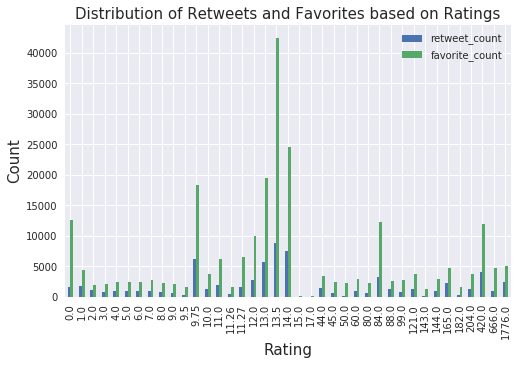

In [76]:
df.groupby('rating_numerator')['retweet_count','favorite_count'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Distribution of Retweets and Favorites based on Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)

- The favorite counts are higher than the retweet counts for each rating
- The dogs with the rating 13.5 are most retweeted and most liked.

It seems like there is a positive correlation between retweet counts and favorite counts based on ratings.

In [77]:
df[['rating_numerator','retweet_count','favorite_count']].corr(method = 'pearson')

,rating_numerator,retweet_count,favorite_count
rating_numerator,1.000000,0.011139,0.009367
retweet_count,0.011139,1.000000,0.926727
favorite_count,0.009367,0.926727,1.000000


Pearson correlation coefficients show that there is indeed a positive correlation between retweet counts and favorite counts. Surprisingly there is no correlation between ratings and retweet counts, as well as ratings and favorite counts.

**Most tweeted dog breeds**

In [78]:
df.prediction1.value_counts()

golden_retriever             128
Labrador_retriever            90
Pembroke                      87
Chihuahua                     75
pug                           52
Pomeranian                    38
chow                          38
toy_poodle                    37
Samoyed                       37
malamute                      28
French_bulldog                26
cocker_spaniel                24
Chesapeake_Bay_retriever      23
miniature_pinscher            21
German_shepherd               20
seat_belt                     20
Siberian_husky                20
teddy                         18
Staffordshire_bullterrier     18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
beagle                        16
web_site                      15
Lakeland_terrier              15
Cardigan                      15
          

Take the dog breeds which are tweeted more than 15 times and exclude the category 'None'

Text(0.5,0,'Breed')

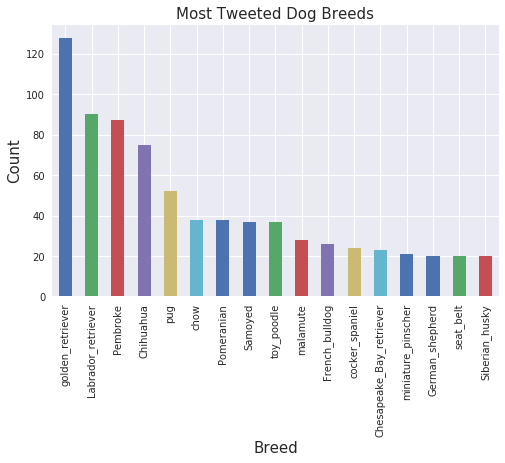

In [79]:
hot_breeds = df.groupby('prediction1').filter(lambda x: len(x) > 19)
hot_breeds['prediction1'].value_counts().plot(kind = 'bar', figsize=(8,5))
plt.title('Most Tweeted Dog Breeds', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Breed', fontsize=15)

**Dog Stage Distribution**

For most of the rows, dog_stage is not known. Let's just consider those rows for which we have information.

In [80]:
df.dog_stage.value_counts()

pupper      248
doggo        83
puppo        31
multiple     12
floofer       9
Name: dog_stage, dtype: int64

Text(0.5,0,'Dog Stage')

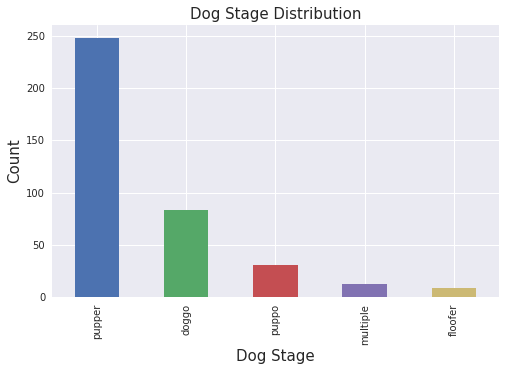

In [81]:
df.dog_stage.value_counts().plot(kind = 'bar', figsize=(8,5))
plt.title('Dog Stage Distribution', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)

**Dog Stage vs Average Favorite Count**

Text(0,0.5,'Avarage Favorite Count')

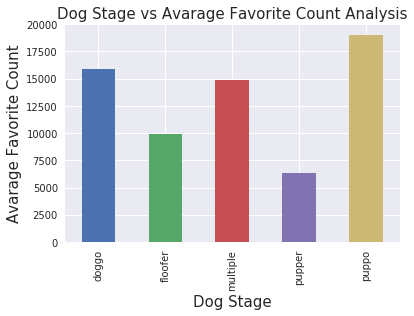

In [82]:
dog_stages = df.groupby('dog_stage').filter(lambda x: len(x) < 250)
dog_stages.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar')
plt.title('Dog Stage vs Avarage Favorite Count Analysis', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Avarage Favorite Count', fontsize=15)

<a id='insights'></a>
## Insights

**1. Dog with the highest favorite count** <br>
The dog with the highest favorite count is a Labrador Retriever. It's dog stage is a doggo. He got a rating of 13/10. <br><br>
**2. Distribution of Retweets and Favorites based on Ratings** <br>
    i) The favorite counts are higher than the retweet counts for each rating <br>
    ii) The dogs with the rating 13.5 are most retweeted and most liked. <br><br>
**3. Correlation between retweet counts and favorite counts** <br>
It seems like there is a positive correlation between retweet counts and favorite counts based on ratings. <br>
Pearson correlation coefficients show that there is indeed a positive correlation between retweet counts and favorite counts. Surprisingly there is no correlation between ratings and retweet counts, as well as ratings and favorite counts. <br><br>
**4. Most Tweeted Dog Breeds** <br>
Most tweeted dog breeds in order: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug. Golden Retriever is tweeted substantially higher. <br><br>
**5. Dog Stage Distribution** <br>
According to analysis done, we find that most of the dogs are Pupper and  comprises more than 60% of total dogs<br><br>

### Remark
The dog breed is considered based on the image prediction algorithm and it might not be 100% accurate. <br>
The information used for the dog stage distribution analysis is done using only 382 rows. There are total 2175 rows.<br>

<a id='references'></a>
## References
[Github](https://github.com/yagmurdalman/wrangle-and-analyze-data/blob/master/wrangle_act.ipynb)<br>
[Pandas documentation](https://pandas.pydata.org/docs/user_guide/)<br>
[Numpy documentation](https://numpy.org/doc/stable/user/)<br>
[Matplotlib documentation](https://matplotlib.org/3.2.1/tutorials/index.html)<br>
[Github](https://github.com/darshan-gandhi/Udacity/blob/master/wrangle_act.ipynb)<br>
[Tweepy documentation](http://docs.tweepy.org/en/latest/)<br>
[Github](https://github.com/latinacode/Wrangle-and-Analyze-Data)